In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Magang/Student Mental health.csv")
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Timestamp                                     101 non-null    object
 1   Choose your gender                            101 non-null    object
 2   Age                                           101 non-null    int64 
 3   What is your course?                          101 non-null    object
 4   Your current year of Study                    101 non-null    object
 5   What is your CGPA?                            101 non-null    object
 6   Marital status                                101 non-null    object
 7   Do you have Depression?                       101 non-null    object
 8   Do you have Anxiety?                          101 non-null    object
 9   Do you have Panic attack?                     101 non-null    object
 10  Di

In [ ]:
df.shape

(101, 11)

In [ ]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    101
dtype: int64

In [ ]:
df["Do you have Panic attack?"].value_counts()

No     68
Yes    33
Name: Do you have Panic attack?, dtype: int64

In [ ]:
df["Do you have Anxiety?"].value_counts()

No     67
Yes    34
Name: Do you have Anxiety?, dtype: int64

In [ ]:
df["What is your CGPA?"].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: What is your CGPA?, dtype: int64

In [ ]:
df["What is your course?"].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [ ]:
df["Age"].value_counts()

18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: Age, dtype: int64

In [ ]:
df['Your current year of Study'].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Your current year of Study, dtype: int64

In [ ]:
dic_typo = { 'engin' : 'Engineering', 'Engine' : 'Engineering', 'Koe' : 'KOE', 'Islamic Education' : 'Pendidikan Islam',
            'Irkhs' : 'KIRKHS', 'Pendidikan islam' : 'Pendidikan Islam', 'Laws' : 'Law', 'koe' : 'KOE', 'Nursing ' : 'Diploma Nursing',
             'Pendidikan Islam ' : 'Pendidikan Islam', 'Islamic education' : 'Pendidikan Islam', 'BIT' : 'Business Information Technology', 'BCS' : 'Bachelor of Communication Science',
             'year 1' : 'Year 1', 'year 2' : 'Year 2', 'year 3' : 'Year 3', 'year 4' : 'Year 4',
             '3.50 - 4.00 ' : '3.50 - 4.00'}
df_clean = df.replace(dic_typo)
df_clean["What is your course?"].value_counts()

Engineering                          20
Bachelor of Communication Science    18
Business Information Technology      10
KOE                                   6
Pendidikan Islam                      5
Biomedical science                    4
Law                                   3
KIRKHS                                2
BENL                                  2
psychology                            2
Diploma Nursing                       2
Kop                                   1
Econs                                 1
MHSC                                  1
Malcom                                1
Human Resources                       1
Human Sciences                        1
CTS                                   1
Communication                         1
Radiography                           1
Fiqh fatwa                            1
DIPLOMA TESL                          1
Biotechnology                         1
Benl                                  1
IT                                    1


In [ ]:
df_clean["Your current year of Study"].value_counts()

Year 1    43
Year 2    26
Year 3    24
Year 4     8
Name: Your current year of Study, dtype: int64

In [ ]:
df_clean["What is your CGPA?"].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: What is your CGPA?, dtype: int64

In [ ]:
agg_anxiety = df_clean.groupby("What is your course?", as_index = False)['Do you have Anxiety?'].count()
agg_anxiety = agg_anxiety.sort_values(by='Do you have Anxiety?', ascending=False)
agg_anxiety

,What is your course?,Do you have Anxiety?
16,Engineering,20
3,Bachelor of Communication Science,18
9,Business Information Technology,10
24,KOE,6
32,Pendidikan Islam,5
6,Biomedical science,4
27,Law,3
37,psychology,2
13,Diploma Nursing,2
23,KIRKHS,2


In [ ]:
df_clean.to_csv('mentalHealth.csv')

<ipython-input-37-5c44ef59ad2a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


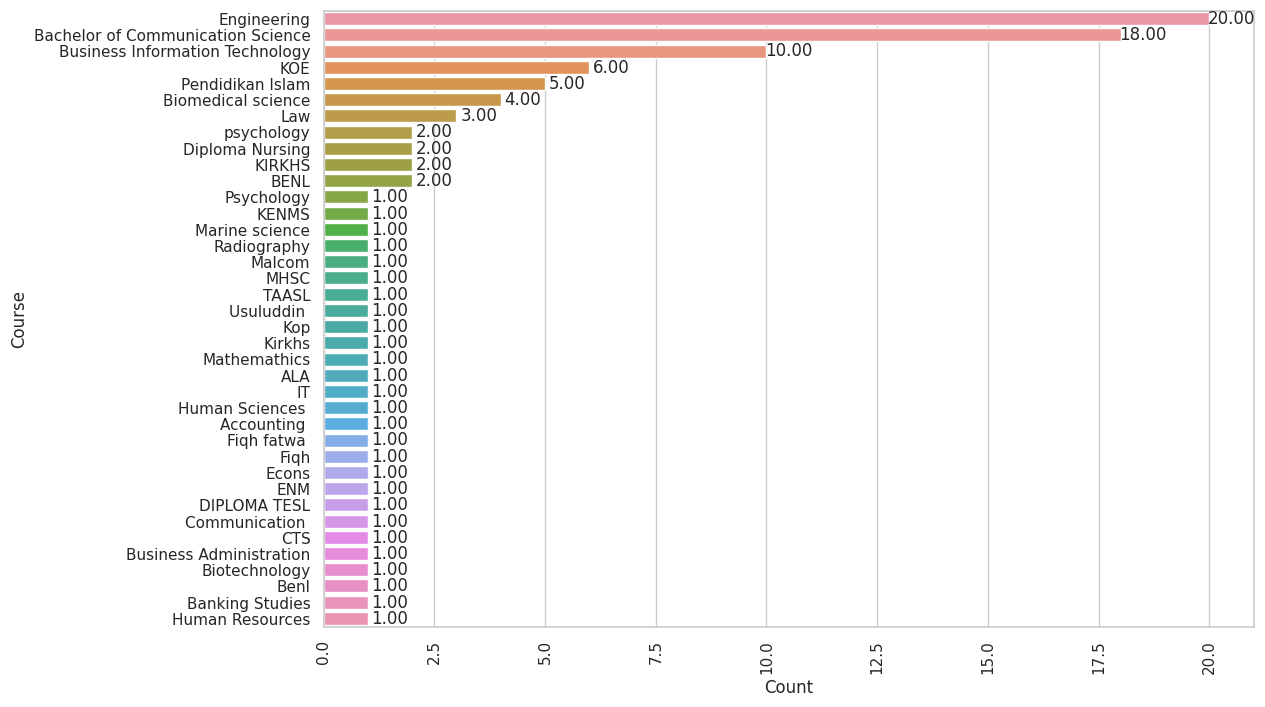

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
barplot = sns.barplot(x='Do you have Anxiety?', y='What is your course?', data=agg_anxiety)
plt.xlabel('Count')
plt.ylabel('Course')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center' )
plt.show()

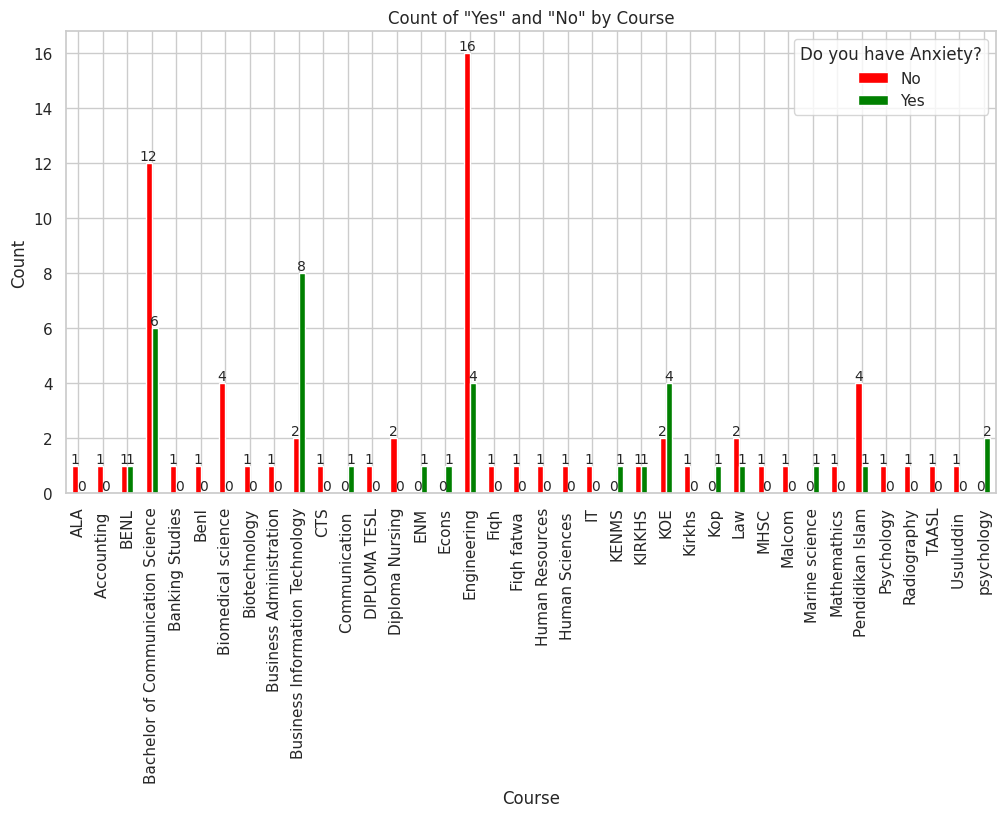

In [ ]:
count_data = df_clean.groupby(['What is your course?', 'Do you have Anxiety?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Course')
plt.legend(title='Do you have Anxiety?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

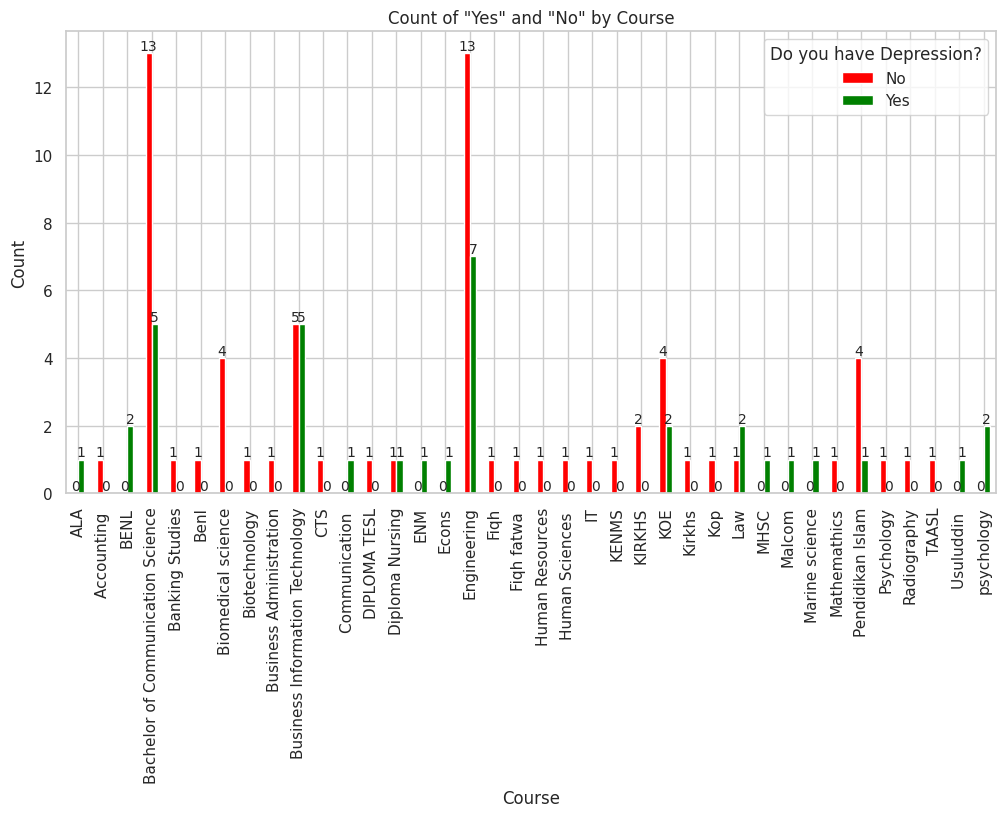

In [ ]:
count_data = df_clean.groupby(['What is your course?', 'Do you have Depression?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Course')
plt.legend(title='Do you have Depression?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

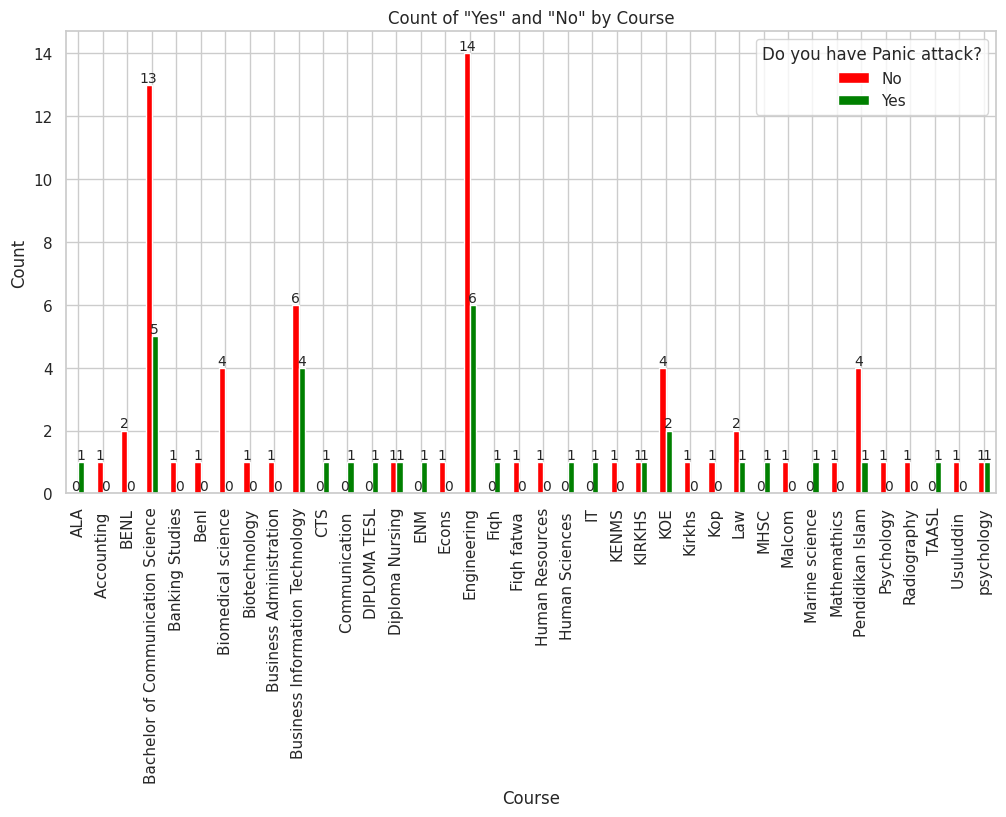

In [ ]:
count_data = df_clean.groupby(['What is your course?', 'Do you have Panic attack?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Course')
plt.legend(title='Do you have Panic attack?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

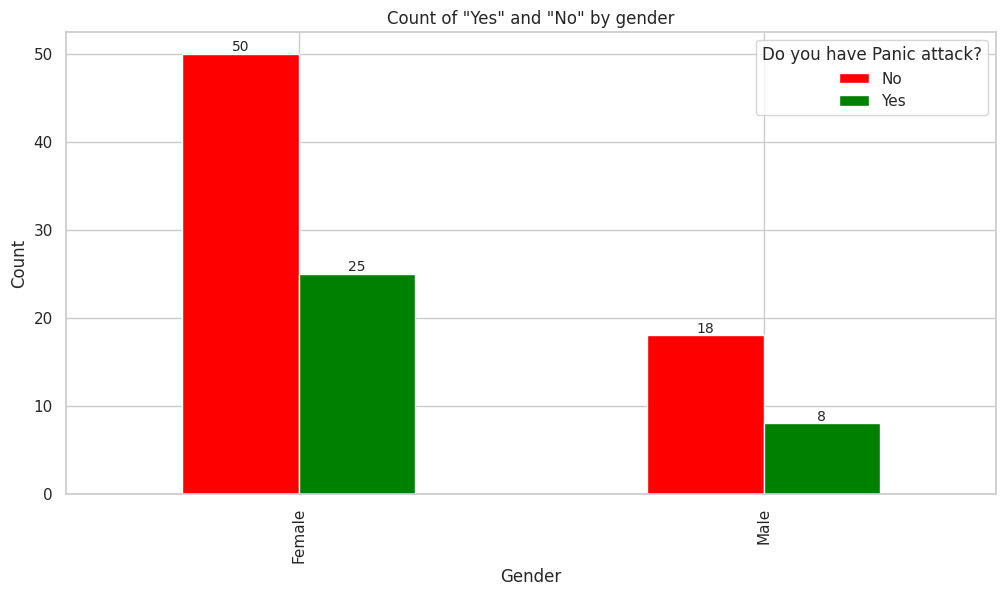

In [ ]:
count_data = df_clean.groupby(['Choose your gender', 'Do you have Panic attack?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by gender')
plt.legend(title='Do you have Panic attack?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

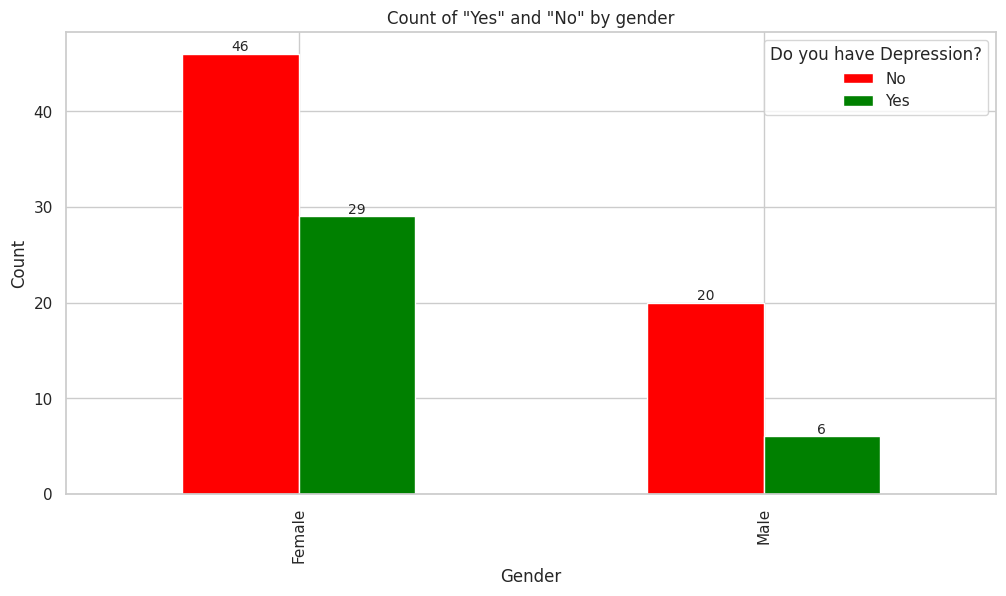

In [ ]:
count_data = df_clean.groupby(['Choose your gender', 'Do you have Depression?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by gender')
plt.legend(title='Do you have Depression?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

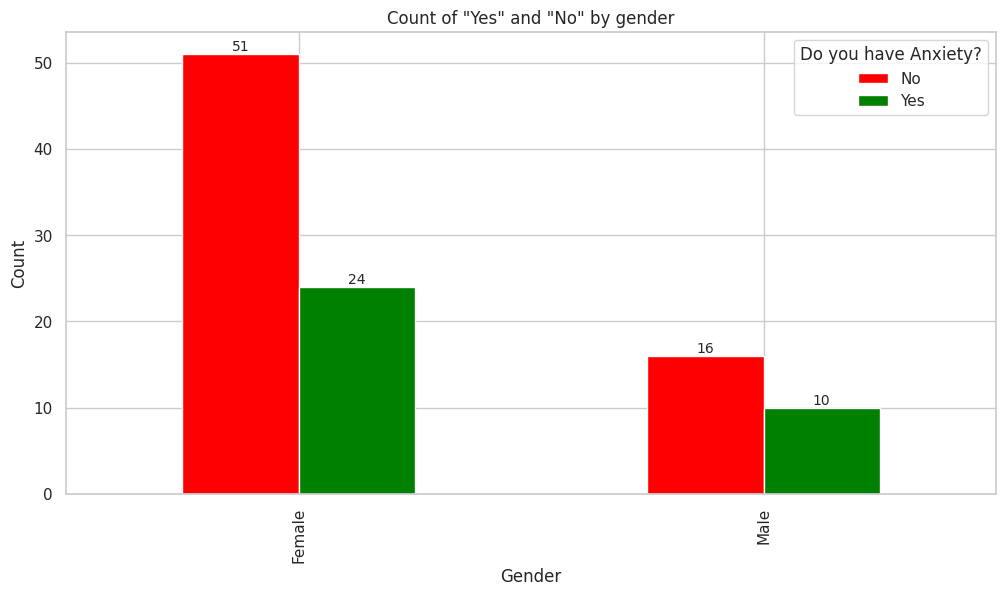

In [ ]:
count_data = df_clean.groupby(['Choose your gender', 'Do you have Anxiety?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by gender')
plt.legend(title='Do you have Anxiety?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

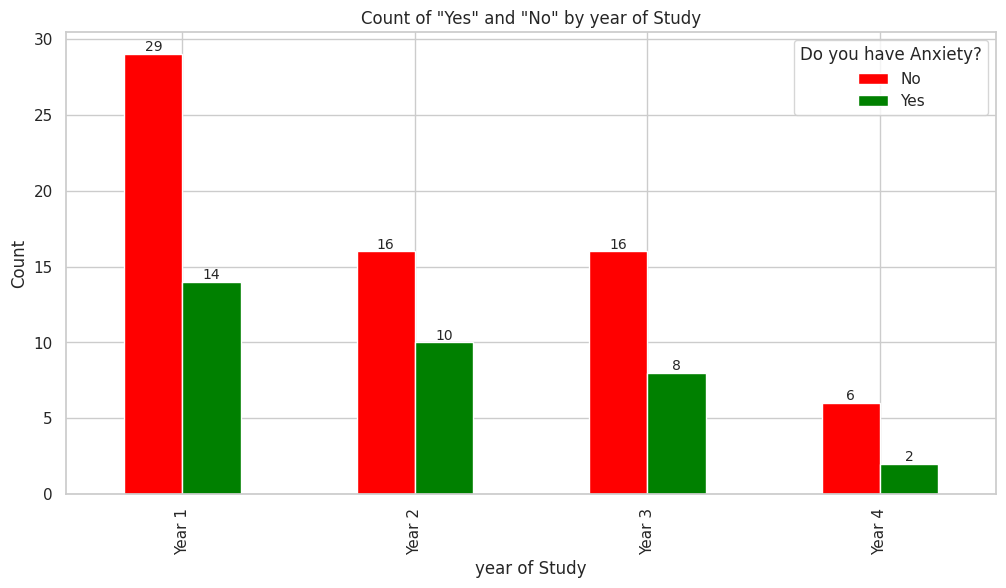

In [ ]:
count_data = df_clean.groupby(['Your current year of Study', 'Do you have Anxiety?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('year of Study')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by year of Study')
plt.legend(title='Do you have Anxiety?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

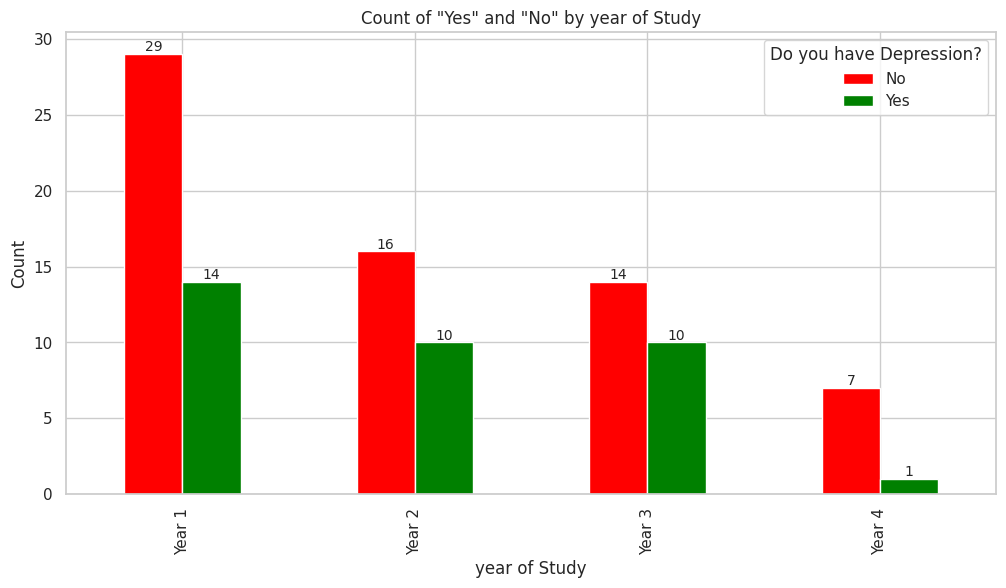

In [ ]:
count_data = df_clean.groupby(['Your current year of Study', 'Do you have Depression?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('year of Study')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by year of Study')
plt.legend(title='Do you have Depression?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

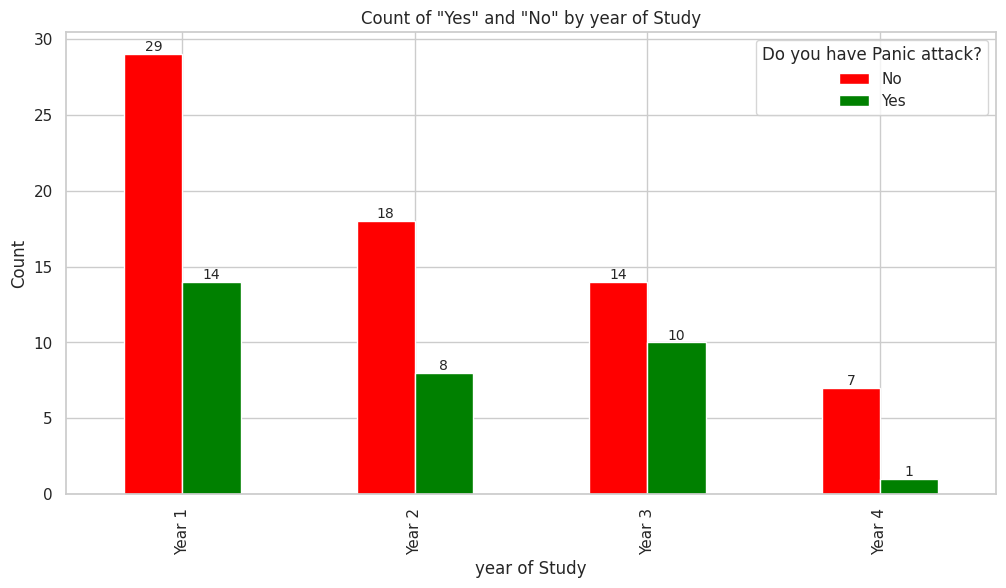

In [ ]:
count_data = df_clean.groupby(['Your current year of Study', 'Do you have Panic attack?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('year of Study')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by year of Study')
plt.legend(title='Do you have Panic attack?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

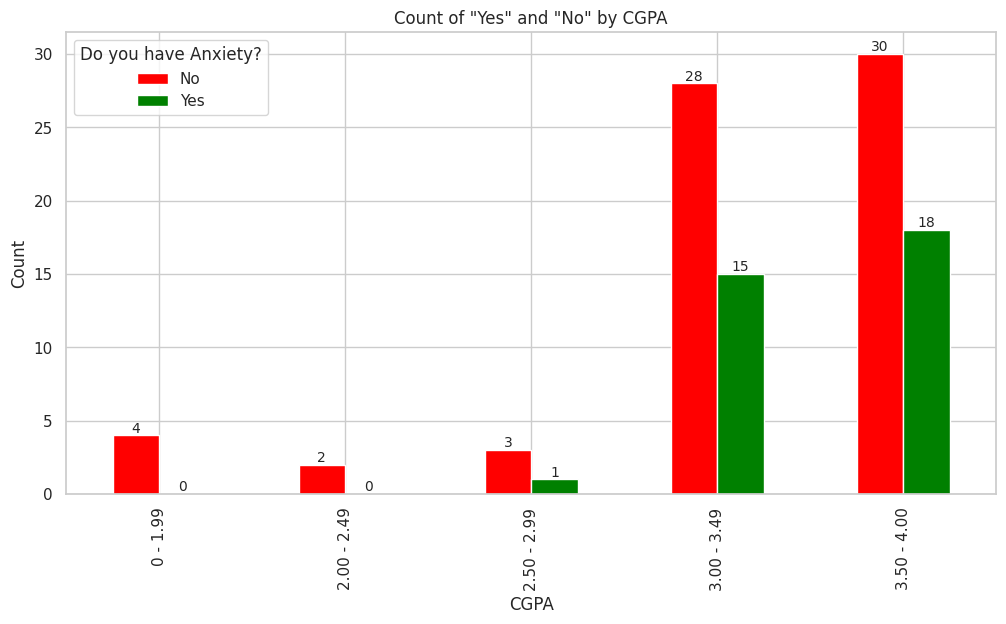

In [ ]:
count_data = df_clean.groupby(['What is your CGPA?', 'Do you have Anxiety?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by CGPA')
plt.legend(title='Do you have Anxiety?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

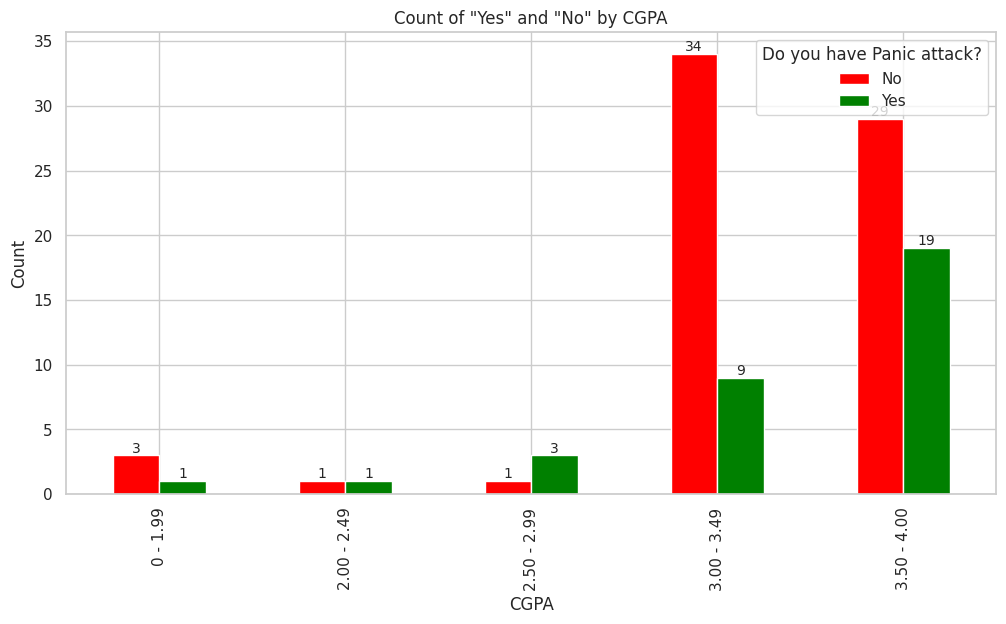

In [ ]:
count_data = df_clean.groupby(['What is your CGPA?', 'Do you have Panic attack?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by CGPA')
plt.legend(title='Do you have Panic attack?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

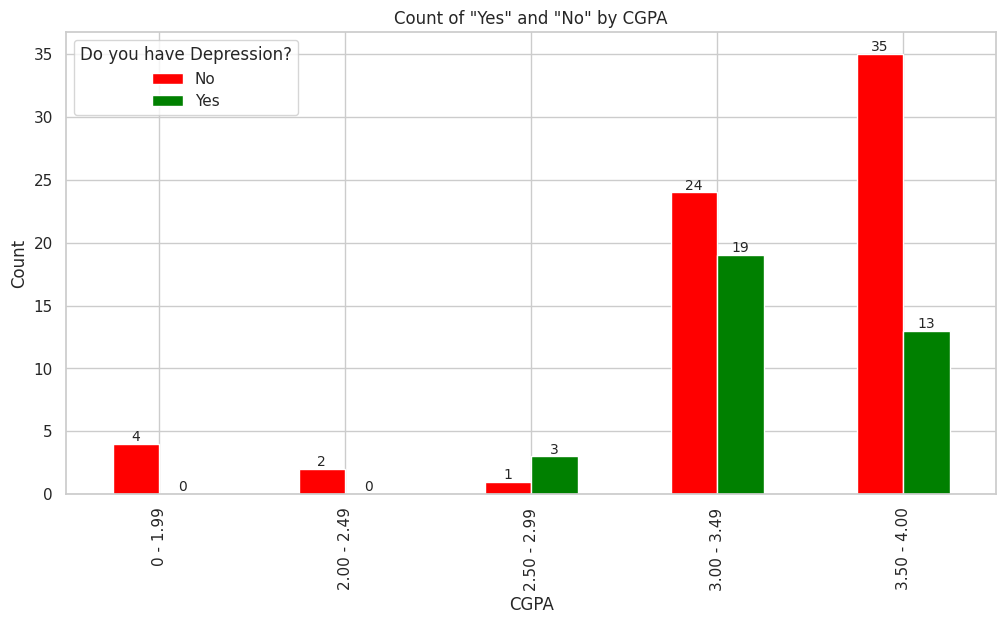

In [ ]:
count_data = df_clean.groupby(['What is your CGPA?', 'Do you have Depression?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by CGPA')
plt.legend(title='Do you have Depression?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

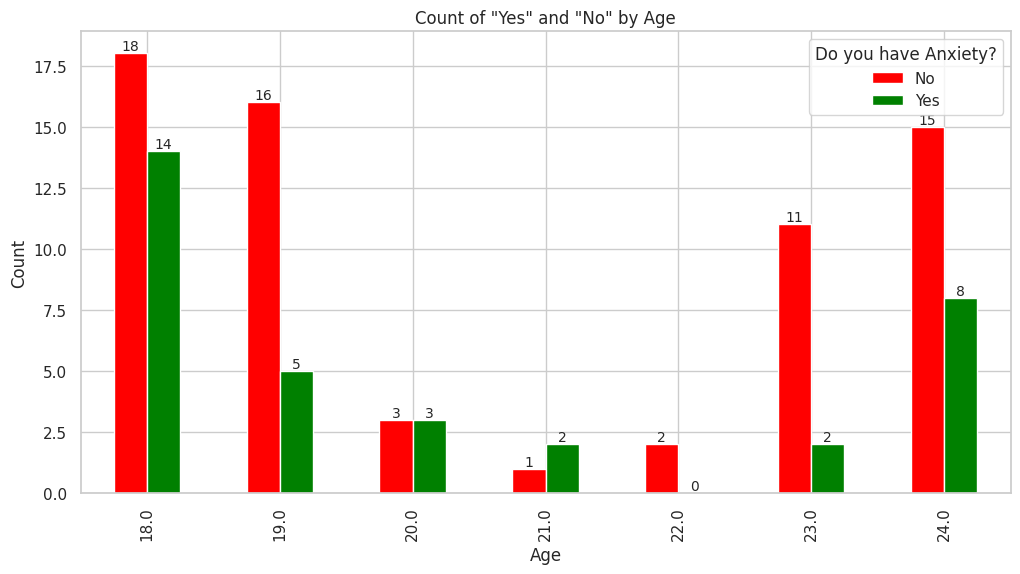

In [ ]:
count_data = df_clean.groupby(['Age', 'Do you have Anxiety?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Age')
plt.legend(title='Do you have Anxiety?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

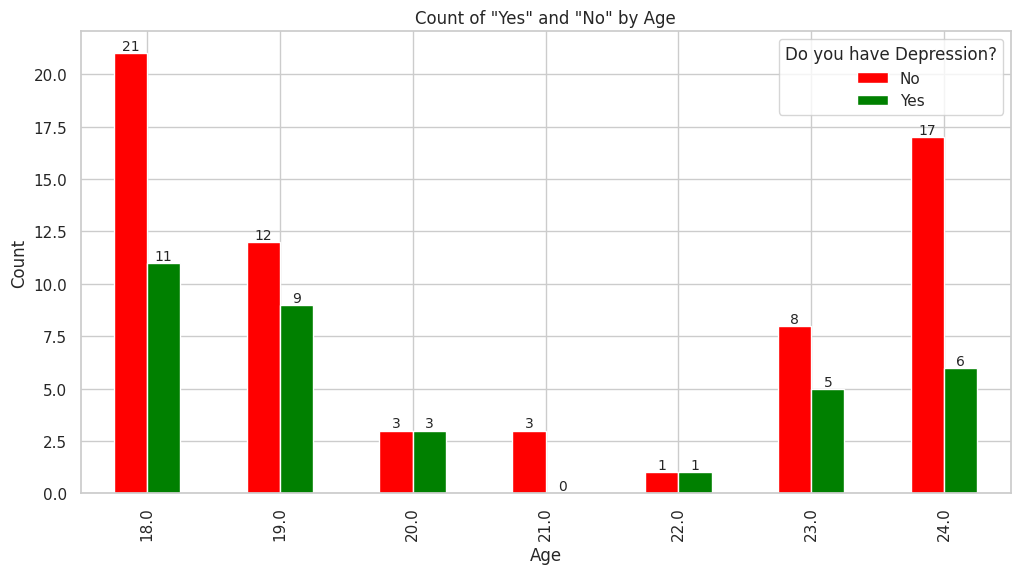

In [ ]:
count_data = df_clean.groupby(['Age', 'Do you have Depression?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Age')
plt.legend(title='Do you have Depression?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()

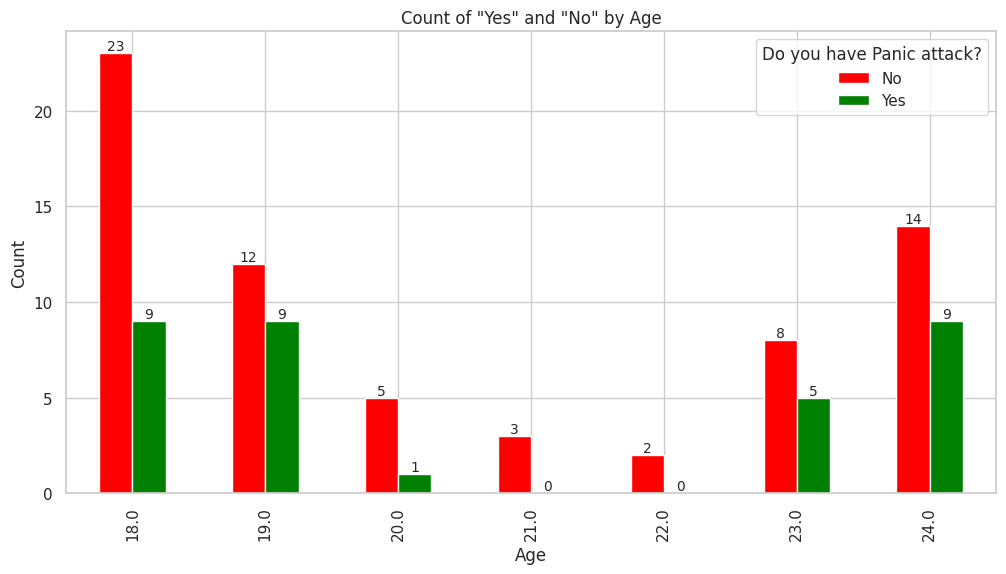

In [ ]:
count_data = df_clean.groupby(['Age', 'Do you have Panic attack?']).size().unstack(fill_value=0)

# Menampilkan hasil dalam bentuk bar plot
sns.set(style="whitegrid")
ax = count_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of "Yes" and "No" by Age')
plt.legend(title='Do you have Panic attack?', labels=['No', 'Yes'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    plt.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10)
plt.show()